### Assignment
- Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. 
- When testing and comparing your models, aim to minimize the RMSE measure.

### Data exploration and Processing

In [4]:
import pandas as pd
import os
import numpy as np

In [6]:
# read datasets as intsructed
train_df = pd.read_json("./train_dataset.json", orient="columns")
test_df = pd.read_json("./test_dataset.json", orient="columns")
val_df = pd.read_json("./val_dataset.json", orient="columns")

df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [8]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [10]:
# Look at unique values of each column, except the ones formatted as list
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

In [12]:
#  state only takes one value  
# drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [14]:
# columns of communications, input_devices and multimedia include multiple values in a cell in list format
# not possible to represent them in numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [16]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [18]:
# get unique values of each features in our predefined lists 
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [20]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [22]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [24]:
# transform string value to integer by excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)

# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [26]:
# screen size column is given as intervals. 
# convert it as integers such as so 11.9" and less would become 11
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [28]:
# split resolution (px) column into two columns of integers (resolution_x and resolution_y)
# as 1280 x 800 would have 1280 in the first column and 800 in the second column 
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [30]:
# resolution (px) is divided into resolution_x and resolution_y 
# drop resolution (px) 
df = df.drop(columns=['resolution (px)'])

In [32]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [34]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [36]:
# use get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [38]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [42]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,True,False,True,False
5845,True,False,False,True
5897,False,True,True,False
4870,False,True,True,False
2498,True,False,True,False
...,...,...,...,...
9211,True,False,True,False
2748,True,False,False,True
2072,True,False,True,False
4741,True,False,True,False


In [44]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df 

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [48]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,True,False,True,False,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,True,False,False,True,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,False,True,True,False,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,False,True,True,False,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,True,False,True,False,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


### Multicolinearity Check 

In [51]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# compute VIF score with variance_inflation_factor() function
def compute_vif(df):
    # Filter only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(numeric_df.values, i)
        for i in range(numeric_df.shape[1])
    ]
    return vif_data.sort_values(by='VIF').reset_index(drop=True)

# Usage
vif_result = compute_vif(new_df)
print(vif_result)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            feature       VIF
0             windows 7 home 64-bit  1.027750
1   windows 8.1 professional 32-bit  1.031814
2     windows 7 professional 32-bit  1.034460
3              wi-fi 802.11 a/b/g/n  1.069641
4           wi-fi 802.11 a/b/g/n/ac  1.120634
..                              ...       ...
59                           hybrid       inf
60                              hdd       inf
61                             emmc       inf
62                           amd a6       inf
63                        other CPU       inf

[64 rows x 2 columns]


In [67]:
# Start with all numeric columns
features = new_df.select_dtypes(include=[np.number]).columns.tolist()

# Reduce multicollinearity by iteratively removing features with VIF > 20
multicollinearity = True

while multicollinearity:
    current_df = new_df[features]
    vif_result = compute_vif(current_df)
    
    # Check if any VIF > 20
    if vif_result['VIF'].max() > 20:
        # Remove the feature with the highest VIF
        highest_vif_feature = vif_result.sort_values('VIF', ascending=False)['feature'].iloc[0]
        print(f"Removing '{highest_vif_feature}' with VIF={vif_result['VIF'].max():.2f}")
        features.remove(highest_vif_feature)
    else:
        multicollinearity = False

# Final selected features with low multicollinearity
selected_features = features
vif_result = compute_vif(new_df[selected_features])
print(vif_result)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing 'other CPU' with VIF=inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing 'hdd' with VIF=inf
Removing 'ddr4' with VIF=1106.68
Removing 'resolution_x' with VIF=16875.05
Removing 'touchpad' with VIF=375.04
Removing 'screen size' with VIF=312.88
Removing 'camera' with VIF=111.54
Removing 'CPU clock speed (GHz)' with VIF=106.87
Removing 'windows 10 home' with VIF=75.56
Removing 'intel core i7' with VIF=40.96
Removing 'keyboard' with VIF=37.93
Removing 'bluetooth' with VIF=31.74
Removing 'CPU cores' with VIF=26.29
Removing 'resolution_y' with VIF=22.56
                            feature        VIF
0   windows 8.1 professional 32-bit   1.003809
1             windows 7 home 64-bit   1.007310
2                   intel celeron m   1.014100
3     windows 7 professional 32-bit   1.017267
4                      intel core m   1.026308
5           windows 8.1 home 32-bit   1.027115
6                            amd a4   1.031958
7                            amd e1   1.033196
8                           amd a10   1.040190
9                           amd a12   1.0

In [69]:
import seaborn as sns
from matplotlib import pyplot as plt

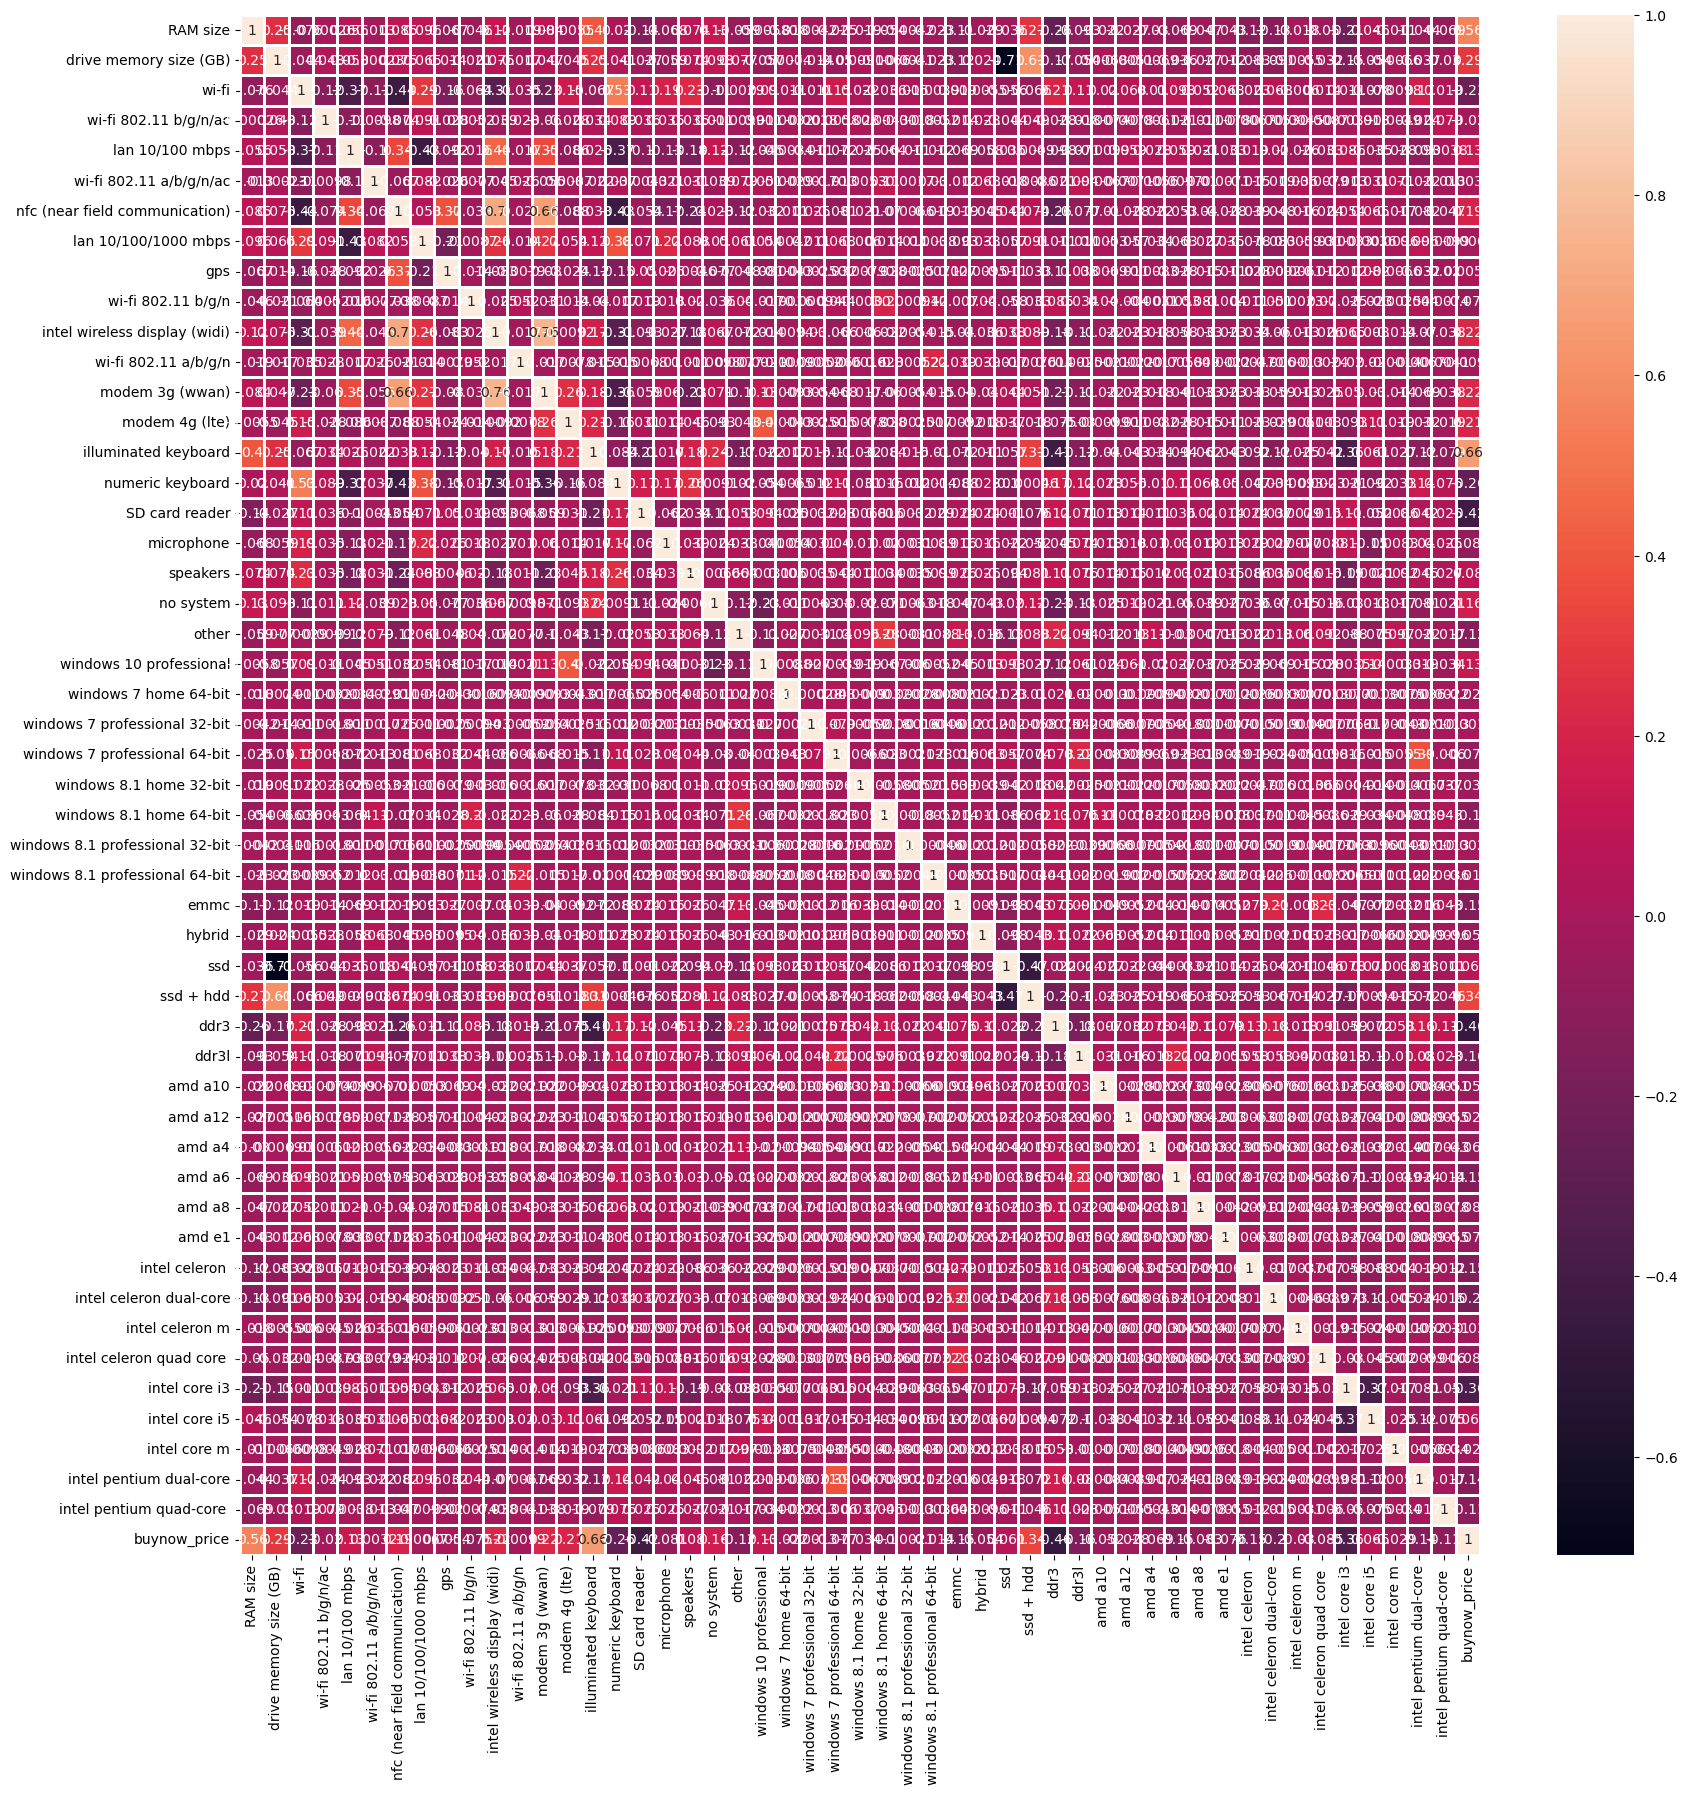

In [71]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

### Train/Val/Test Split

In [74]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [76]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [78]:
# sklearn machine learning models expect y_train, y_test, y_val 
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [80]:
X_train.shape

(3694, 50)

In [82]:
y_train.shape

(3694,)

### Classical ML 

We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with MaxAbsScaler() from sklearn, which works well with sparse datasets.

Linear: RMSE = 794.4322


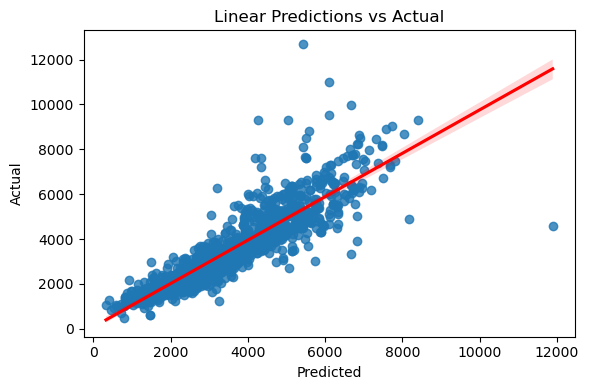

MLP: RMSE = 746.9230


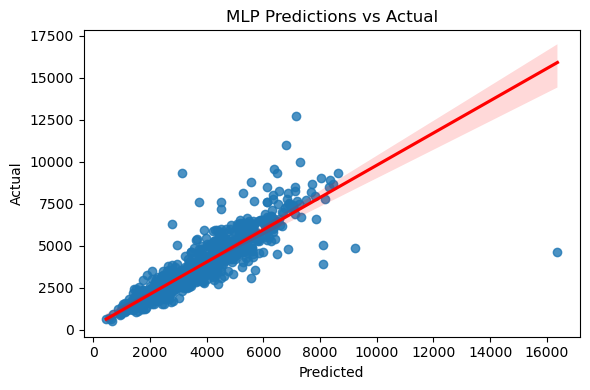

DecisionTree: RMSE = 734.0329


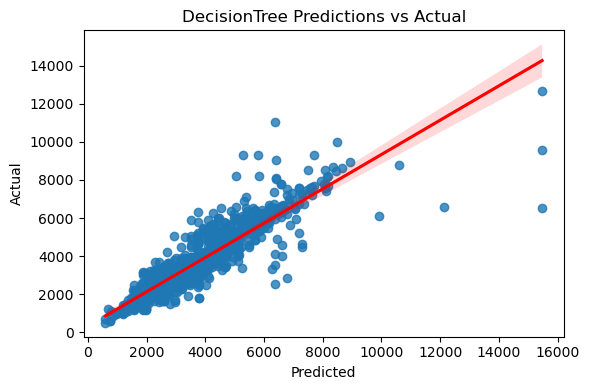

RandomForest: RMSE = 603.8156


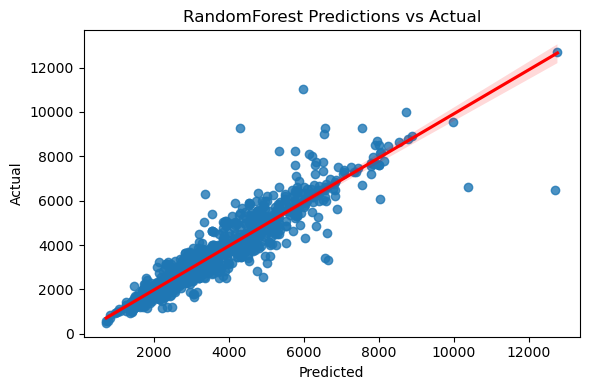

GradientBoosting: RMSE = 593.9718


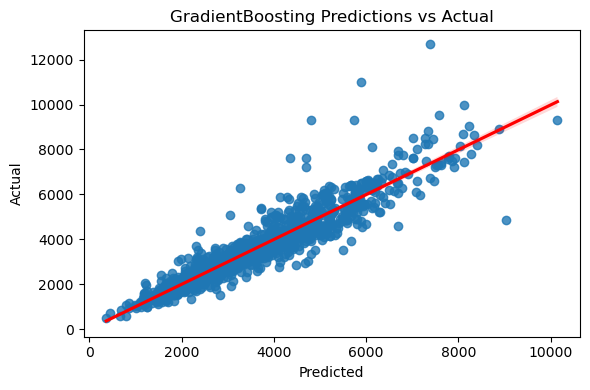

ExtraTrees: RMSE = 625.0596


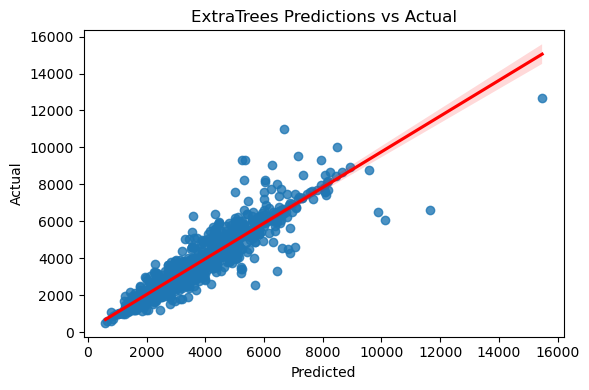

In [88]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns

# RMSE function compatible with all sklearn versions
def rmse(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Wrapper to train and evaluate each regressor
def regression(regressor_name, regressor):
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(f"{regressor_name}: RMSE = {rmse_val:.4f}")
    pred_df[regressor_name + '_Pred'] = predicted

    plt.figure(figsize=(6, 4))
    plt.title(f'{regressor_name} Predictions vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    sns.regplot(x=predicted, y=y_test, line_kws={"color": "red"})
    plt.tight_layout()
    plt.show()

# Dictionary of regressors
regressors = {
    'Linear': LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error', learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize prediction dataframe
pred_df = pd.DataFrame({"Actual": y_test})

# Run regressors
for name, model in regressors.items():
    regression(name, model)


### Voting Regressor 

Voting: RMSE = 541.4331


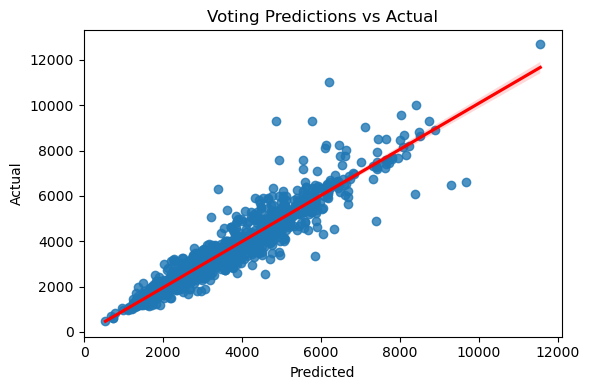

In [91]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights 
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [93]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2373.597020,2418.006008,2222.333333,2223.093810,2420.643428,2222.333333,2301.847490
1,2299.00,2454.518684,2289.514026,2484.815789,2367.396667,2220.247044,2384.000000,2314.347984
2,5999.00,5071.691823,5120.319199,4965.666667,5004.482143,5093.636196,4999.000000,5038.225014
3,1299.00,1023.199263,1201.724973,1249.000000,1250.719246,1224.296853,1249.000000,1239.548553
4,3329.00,6673.546897,4935.636654,6274.000000,6631.869444,4814.473279,6436.000000,5836.356673
...,...,...,...,...,...,...,...,...
1195,5599.00,5775.362437,5775.669376,5674.000000,5673.553571,6188.638075,5674.000000,5879.743623
1196,2925.36,3085.104468,2394.052162,2591.813200,2701.029150,2597.663560,2693.507500,2657.050336
1197,3799.00,4241.897667,4319.338133,4561.500000,4296.469333,4016.085136,4207.550000,4153.193888
1198,5589.00,5120.472392,5171.104314,4872.000000,4780.974667,5195.381640,4318.095000,4784.729572


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution.

### Deep Learning

Another promising regression algorithm is artificial neural networks. We will create a small one with 4 hidden units since we have small data. We will use a scheduler to decrease the learning rate after a certain epoch number. Also, to prevent overfitting, we will use EarlyStopping.

We will make a comparison between a complex model (two hidden layers) and a base model to see what works best.



In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Use native TF for RMSE to avoid Keras backend issues
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Learning rate scheduler
# Corrected learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.01))

# Base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Input(shape=(len(selected_features),)),
        layers.Normalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        loss=root_mean_squared_error,
        optimizer=keras.optimizers.Adam(0.005)
    )
    return model

# Callbacks
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

# Training (assumes X_train, X_val, y_train, y_val, selected_features are ready)
dnn_model = build_and_compile_base_model()

history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks=[scheduler_c, early_stopping],
    verbose=1,
    epochs=400
)


Epoch 1/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 3135.1248 - val_loss: 2165.7917 - learning_rate: 0.0050
Epoch 2/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 2213.7275 - val_loss: 2077.4863 - learning_rate: 0.0050
Epoch 3/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 2083.7124 - val_loss: 1847.7889 - learning_rate: 0.0050
Epoch 4/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 1758.5634 - val_loss: 1381.3156 - learning_rate: 0.0050
Epoch 5/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1440.0448 - val_loss: 1288.9860 - learning_rate: 0.0050
Epoch 6/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 1366.6802 - val_loss: 1253.4506 - learning_rate: 0.0050
Epoch 7/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 1325.4131 - val_loss: 1215.1572 - learning_rate: 0.0050
Epoch 8/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 1271.3263 - val_loss: 1181.2834 - learning_rate: 0.0050
Epoch 9/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 480u

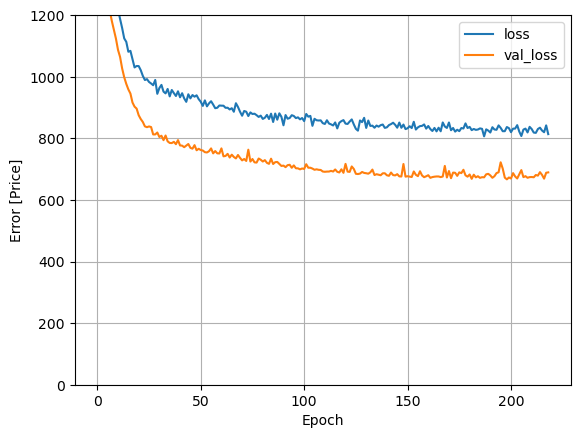

In [116]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [118]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 762.9150


769.21484375

In [120]:
# compile complex model
dnn_model = build_and_compile_complex_model()

In [122]:
dnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 50)             │           101 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,966 (15.50 KB)

 Trainable params: 3,865 (15.10 KB)

 Non-trainable params: 101 (408.00 B)

In [124]:
# train complex model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 3242.3066 - val_loss: 2170.8425 - learning_rate: 0.0050
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 2193.6838 - val_loss: 2061.4563 - learning_rate: 0.0050
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 1990.0277 - val_loss: 1411.6692 - learning_rate: 0.0050
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1361.8295 - val_loss: 1271.4728 - learning_rate: 0.0050
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 1297.4733 - val_loss: 1211.3878 - learning_rate: 0.0050
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 1238.4106 - val_loss: 1154.5765 - learning_rate: 0.0050
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 1214.6174 - val_loss: 1107.0723 - learning_rate: 0.0050
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1156.8965 - val_loss: 1062.7430 - learning_rate: 0.0050
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - 

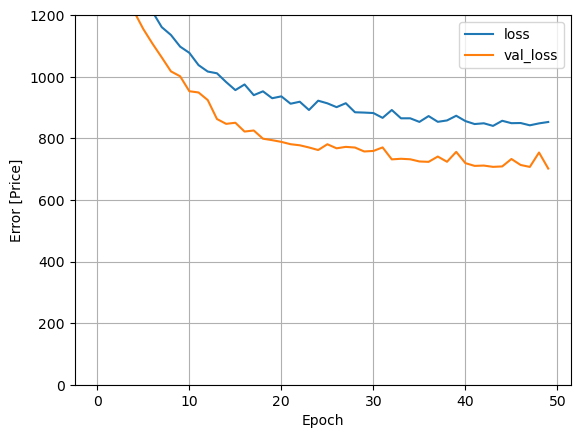

In [126]:
plot_loss(history)

In [128]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 788.0619


792.6907958984375

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

### Feature Selection

Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=15, but you can change and see the results for different k values.

In [135]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['RAM size',
 'drive memory size (GB)',
 'wi-fi',
 'lan 10/100 mbps',
 'nfc (near field communication)',
 'intel wireless display (widi)',
 'modem 3g (wwan)',
 'modem 4g (lte)',
 'illuminated keyboard',
 'numeric keyboard',
 'SD card reader',
 'no system',
 'other',
 'windows 10 professional',
 'windows 8.1 home 64-bit',
 'emmc',
 'ssd + hdd',
 'ddr3',
 'ddr3l',
 'amd a6',
 'intel celeron ',
 'intel celeron dual-core',
 'intel core i3',
 'intel pentium dual-core',
 'intel pentium quad-core ']

In [137]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest: RMSE = 737.0193


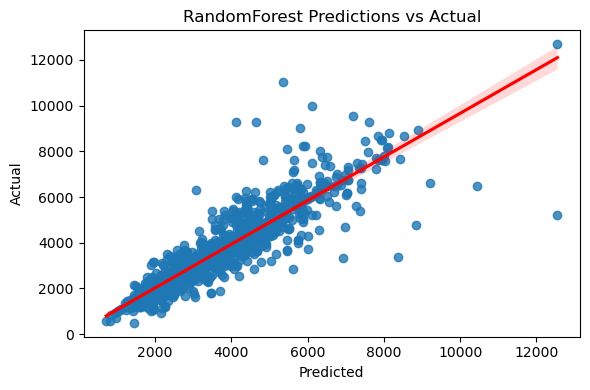

In [139]:
regression('RandomForest', regressors['RandomForest'])

Feature: RAM size , Score: 0.11062491139181738
Feature: drive memory size (GB) , Score: 0.07015822766485834
Feature: wi-fi , Score: 0.011975934681348985
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.0006819845367186596
Feature: lan 10/100 mbps , Score: 0.02700186777169223
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.0012922505638695036
Feature: nfc (near field communication) , Score: 0.004353071779332729
Feature: lan 10/100/1000 mbps , Score: 0.009629377484451435
Feature: gps , Score: 0.002517354809642658
Feature: wi-fi 802.11 b/g/n , Score: 0.00030683230599048067
Feature: intel wireless display (widi) , Score: 0.009358632801445287
Feature: wi-fi 802.11 a/b/g/n , Score: 0.0004709431467711198
Feature: modem 3g (wwan) , Score: 0.004702933178009891
Feature: modem 4g (lte) , Score: 0.0051772574827464056
Feature: illuminated keyboard , Score: 0.41782478139401613
Feature: numeric keyboard , Score: 0.022421571351985293
Feature: SD card reader , Score: 0.12071025562308738
Feature: microphone , Scor

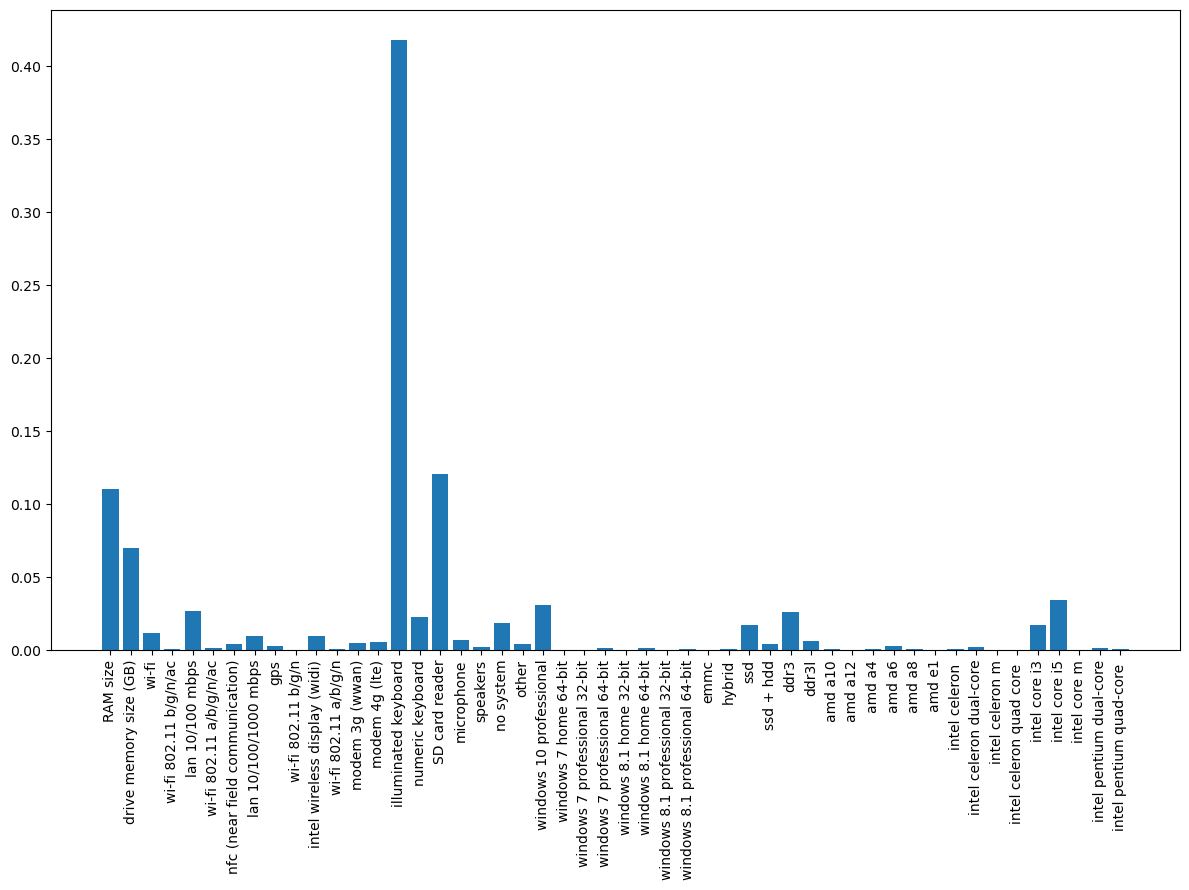

In [141]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [143]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['RAM size',
 'drive memory size (GB)',
 'lan 10/100 mbps',
 'illuminated keyboard',
 'numeric keyboard',
 'SD card reader',
 'windows 10 professional',
 'ddr3',
 'intel core i5']

In [145]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest: RMSE = 729.1254


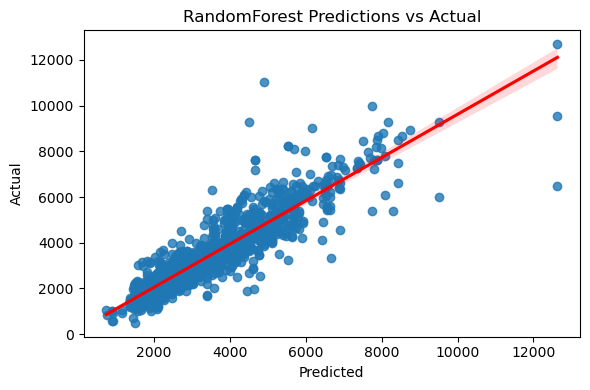

In [147]:
regression('RandomForest', regressors['RandomForest'])

Still, the complete feature set provides better results compared to features with the highest importance.